# Project :- Traffic Accident Analysis Using Machine Learning 

## Goal :- The goal of this project is the investigate what causes Serious and Fatal accidents in hopes of preventing and decreasing the number of them. 

# # Importing and Data Merging

In [293]:
#Import modules
import numpy as np

import pandas as pd
import seaborn as sns
import pickle
import time
import timeit


import matplotlib.pyplot as plt
plt.style.use('dark_background')
%matplotlib inline

import datetime
import math
from collections import Counter

#scipy
import scipy.stats as stats
from scipy import stats
from scipy.stats import chi2_contingency

#sklearn
import sklearn
from sklearn import ensemble
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, log_loss, recall_score 
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample

from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score 

#for clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score


#webscraping
import requests
from bs4 import BeautifulSoup
import re
import urllib
from IPython.core.display import HTML

#time series
import statsmodels.api as sm
from pylab import rcParams
import itertools
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA


#warning ignorer
import warnings
warnings.filterwarnings("ignore")


In [7]:
#import files

a_data = pd.read_csv('Accident_Information.csv', delimiter=',', quotechar='"')
v_data = pd.read_csv('Vehicle_Information.csv', delimiter=',', quotechar='"', encoding= 'unicode_escape')

In [8]:
v_data.head()

,Accident_Index,Age_Band_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Driver_IMD_Decile,Engine_Capacity_.CC.,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,Journey_Purpose_of_Driver,Junction_Location,...,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year
0,200401BS00001,26 - 35,3.0,Urban area,4.0,1588.0,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,109,Data missing or out of range,Front,2004
1,200401BS00002,26 - 35,NaN,Urban area,3.0,NaN,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,109,Data missing or out of range,Front,2004
2,200401BS00003,26 - 35,4.0,Data missing or out of range,NaN,998.0,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Turning right,1,109,Data missing or out of range,Front,2004
3,200401BS00003,66 - 75,NaN,Data missing or out of range,NaN,NaN,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,109,Data missing or out of range,Front,2004
4,200401BS00004,26 - 35,1.0,Urban area,4.0,124.0,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Motorcycle 125cc and under,Data missing or out of range,Front,2004


In [9]:
# display the length of latitude column to start with feature engineering 
len(a_data['Latitude'])

2047256

# Feature Engineering

Below is the code for creating the extra features in our dataset to fulfil the project demand. In the code, we have generated extra features based on existing attributes called 'Latitude' and 'Longitude'. We are further planning to also generate even more features based on age and vehicle type involved in the accident. This is only for having a large amount of data and using it for further predictions. 

In [10]:
label_encoder = LabelEncoder()
n_bins = 15
x = label_encoder.fit_transform(pd.cut(a_data['Latitude'], n_bins, retbins=True)[0])
y = label_encoder.fit_transform(pd.cut(a_data['Longitude'], n_bins, retbins=True)[0])
z = []
for i in range(len(x)):
    z.append("Area"+str(x[i] + 16*y[i]))
areas = pd.DataFrame(z,columns=["Area"])

In [11]:
one_hot = pd.get_dummies(areas["Area"])

In [12]:
# this is for handling the error or exception
for i in range(0,256):
    try:
        one_hot["Area"+str(i)]
    except KeyError:
        one_hot["Area"+str(i)] = 0

In [13]:
a_data = a_data.join(one_hot)

In [14]:
a_data.head()

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Area245,Area246,Area247,Area248,Area249,Area250,Area251,Area252,Area253,Area254
0,200501BS00001,A,3218.0,NaN,0.0,Serious,None,2005-01-04,Tuesday,1.0,...,0,0,0,0,0,0,0,0,0,0
1,200501BS00002,B,450.0,C,0.0,Slight,None,2005-01-05,Wednesday,1.0,...,0,0,0,0,0,0,0,0,0,0
2,200501BS00003,C,0.0,NaN,0.0,Slight,None,2005-01-06,Thursday,1.0,...,0,0,0,0,0,0,0,0,0,0
3,200501BS00004,A,3220.0,NaN,0.0,Slight,None,2005-01-07,Friday,1.0,...,0,0,0,0,0,0,0,0,0,0
4,200501BS00005,Unclassified,0.0,NaN,0.0,Slight,None,2005-01-10,Monday,1.0,...,0,0,0,0,0,0,0,0,0,0


# Cleaning and dataframing for accident column

Below code is to clear the data from 'Accident Information Dataset' and shape its parameters for further analysis  

In [15]:
a_data['Road_Type'] != "Unknown" 
a_data['Junction_Control'] != "Data missing or out of range"
a_data['Carriageway_Hazards'] != "Data missing or out of range" 
a_data['Junction_Detail'] != "Data missing or out of range" 
a_data['Road_Surface_Conditions'] != "Data missing or out of range" 
a_data['Special_Conditions_at_Site'] != "Data missing or out of range"
a_data['Weather_Conditions'] != "Data missing or out of range" 
a_data['Latitude'].notnull()
a_data['Longitude'].notnull()

0          True
1          True
2          True
3          True
4          True
           ... 
2047251    True
2047252    True
2047253    True
2047254    True
2047255    True
Name: Longitude, Length: 2047256, dtype: bool

In [16]:
a_data

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Area245,Area246,Area247,Area248,Area249,Area250,Area251,Area252,Area253,Area254
0,200501BS00001,A,3218.0,NaN,0.0,Serious,None,2005-01-04,Tuesday,1.0,...,0,0,0,0,0,0,0,0,0,0
1,200501BS00002,B,450.0,C,0.0,Slight,None,2005-01-05,Wednesday,1.0,...,0,0,0,0,0,0,0,0,0,0
2,200501BS00003,C,0.0,NaN,0.0,Slight,None,2005-01-06,Thursday,1.0,...,0,0,0,0,0,0,0,0,0,0
3,200501BS00004,A,3220.0,NaN,0.0,Slight,None,2005-01-07,Friday,1.0,...,0,0,0,0,0,0,0,0,0,0
4,200501BS00005,Unclassified,0.0,NaN,0.0,Slight,None,2005-01-10,Monday,1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2047251,2017984121017,A(M),74.0,NaN,0.0,Slight,None,2017-12-17,Sunday,1.0,...,0,0,0,0,0,0,0,0,0,0
2047252,2017984121217,C,69.0,NaN,0.0,Slight,Pedestrian in carriageway - not injured,2017-12-15,Friday,2.0,...,0,0,0,0,0,0,0,0,0,0
2047253,2017984121717,A(M),74.0,Unclassified,0.0,Slight,None,2017-12-18,Monday,1.0,...,0,0,0,0,0,0,0,0,0,0
2047254,2017984122317,A,708.0,NaN,0.0,Slight,None,2017-07-18,Tuesday,1.0,...,0,0,0,0,0,0,0,0,0,0


Below code is to clear the data from 'Vehicle Information Dataset' and shape its parameters for further analysis  

In [17]:
#Cleaning for vehicles column

v_data['Driver_Home_Area_Type'] != "Data missing or out of range"
v_data['Journey_Purpose_of_Driver'] != "Data missing or out of range"
v_data['Junction_Location'] != "Data missing or out of range"
v_data['Was_Vehicle_Left_Hand_Drive'] != "Data missing or out of range"
v_data['Hit_Object_in_Carriageway'] != "Data missing or out of range"
v_data['Skidding_and_Overturning'] != "Data missing or out of range"
v_data['Towing_and_Articulation'] != "Data missing or out of range"
v_data['Vehicle_Leaving_Carriageway'] != "Data missing or out of range"
v_data['Vehicle_Manoeuvre'] != "Data missing or out of range"
v_data['Vehicle_Type'] != "Data missing or out of range"
v_data['X1st_Point_of_Impact'] != "Data missing or out of range"
v_data['Sex_of_Driver'] != "Data missing or out of range"
v_data['Age_Band_of_Driver'] != "Data missing or out of range"
        

0          True
1          True
2          True
3          True
4          True
           ... 
2177200    True
2177201    True
2177202    True
2177203    True
2177204    True
Name: Age_Band_of_Driver, Length: 2177205, dtype: bool

In [18]:
#check columns
print("Accident's Dataset Columns:\n",a_data.columns, "\n")


print("Vehicle's Dataset Columns:\n",v_data.columns)

Accident's Dataset Columns:
 Index(['Accident_Index', '1st_Road_Class', '1st_Road_Number', '2nd_Road_Class',
       '2nd_Road_Number', 'Accident_Severity', 'Carriageway_Hazards', 'Date',
       'Day_of_Week', 'Did_Police_Officer_Attend_Scene_of_Accident',
       ...
       'Area245', 'Area246', 'Area247', 'Area248', 'Area249', 'Area250',
       'Area251', 'Area252', 'Area253', 'Area254'],
      dtype='object', length=290) 

Vehicle's Dataset Columns:
 Index(['Accident_Index', 'Age_Band_of_Driver', 'Age_of_Vehicle',
       'Driver_Home_Area_Type', 'Driver_IMD_Decile', 'Engine_Capacity_.CC.',
       'Hit_Object_in_Carriageway', 'Hit_Object_off_Carriageway',
       'Journey_Purpose_of_Driver', 'Junction_Location', 'make', 'model',
       'Propulsion_Code', 'Sex_of_Driver', 'Skidding_and_Overturning',
       'Towing_and_Articulation', 'Vehicle_Leaving_Carriageway',
       'Vehicle_Location.Restricted_Lane', 'Vehicle_Manoeuvre',
       'Vehicle_Reference', 'Vehicle_Type', 'Was_Vehicle_Left_

In [19]:
print('Accident Dataset Shape', a_data.shape)
print('Vehicle Dataset Shape', v_data.shape)

Accident Dataset Shape (2047256, 290)
Vehicle Dataset Shape (2177205, 24)


In [21]:
df1=pd.DataFrame(a_data)
# df_sliced1=df1.iloc[0:1000]
df2=pd.DataFrame(v_data)
# df_sliced2=df2.iloc[0:1000]

In [131]:
#merge datasets
mdf = pd.merge(df1,df2)

In [133]:
print("\nShape:\n",mdf.shape)


Shape:
 (2058408, 312)


# Note:- Since, SVM is computationally expensive, we have sliced our data for demonstration purpose. You can remove below step and run the notbook as it is if resources is not a problem.

In [134]:
df=mdf.iloc[0:20000, :]

In [135]:
print("Names of Combined Columns:\n",df.columns, "\n")
print("\nShape:\n",df.shape)

Names of Combined Columns:
 Index(['Accident_Index', '1st_Road_Class', '1st_Road_Number', '2nd_Road_Class',
       '2nd_Road_Number', 'Accident_Severity', 'Carriageway_Hazards', 'Date',
       'Day_of_Week', 'Did_Police_Officer_Attend_Scene_of_Accident',
       ...
       'Sex_of_Driver', 'Skidding_and_Overturning', 'Towing_and_Articulation',
       'Vehicle_Leaving_Carriageway', 'Vehicle_Location.Restricted_Lane',
       'Vehicle_Manoeuvre', 'Vehicle_Reference', 'Vehicle_Type',
       'Was_Vehicle_Left_Hand_Drive', 'X1st_Point_of_Impact'],
      dtype='object', length=312) 


Shape:
 (20000, 312)


In [136]:
df.describe(include ='all')

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Sex_of_Driver,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact
count,20000,20000,20000.000000,13597,19958.000000,20000,20000,20000,20000,19992.000000,...,20000,20000,20000,20000,19994.000000,20000,20000.000000,20000,20000,20000
unique,17096,6,NaN,6,NaN,3,7,365,7,NaN,...,3,7,7,10,NaN,19,NaN,14,3,6
top,200504D008305,A,NaN,Unclassified,NaN,Slight,None,2005-10-20,Friday,NaN,...,Male,None,No tow/articulation,Did not leave carriageway,NaN,Going ahead other,NaN,Car,No,Front
freq,5,11755,NaN,8073,NaN,17485,19748,94,3221,NaN,...,14894,18536,19732,18846,NaN,9591,NaN,12801,19002,8588
mean,NaN,NaN,691.832500,NaN,210.746217,NaN,NaN,NaN,NaN,1.166116,...,NaN,NaN,NaN,NaN,0.055367,NaN,1.486150,NaN,NaN,NaN
std,NaN,NaN,1422.296918,NaN,841.538054,NaN,NaN,NaN,NaN,0.409196,...,NaN,NaN,NaN,NaN,0.590006,NaN,0.686099,NaN,NaN,NaN
min,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,NaN,NaN
25%,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,NaN,NaN
50%,NaN,NaN,105.000000,NaN,0.000000,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,NaN,NaN
75%,NaN,NaN,472.000000,NaN,0.000000,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,2.000000,NaN,NaN,NaN


# Data Cleaning

In [28]:
#check corr b/t Location_Easting_OSGR & Location_Northing_OSGR AND Longitude and Latitude

print(df['Location_Easting_OSGR'].corr(df['Longitude']))


print(df['Location_Northing_OSGR'].corr(df['Latitude']))

0.9999690970762747
0.9999966866960788


In [29]:
#drop Location_Easting_OSGR & Location_Northing_OSGR
#because they are the similar to Latitude and Longitude 

df = df.drop(['Location_Easting_OSGR', 'Location_Northing_OSGR'], axis=1)

In [30]:
df.shape

(20000, 310)

In [137]:
temp=df

#standardize all column names to lowercase, and remove some characters 
#for ease of use in querying
df.columns = map(str.lower, df.columns)
df.columns = df.columns.str.replace('.','')
df.columns = df.columns.str.replace('(','')
df.columns = df.columns.str.replace(')','')

In [138]:
#convert date/time to datetime datatype

df['date'] = pd.to_datetime((df['date']), format= "%Y-%m-%d")

In [33]:
df.columns.to_series().groupby(df.dtypes).groups

{float64: ['1st_road_number', '2nd_road_number', 'did_police_officer_attend_scene_of_accident', 'latitude', 'longitude', 'pedestrian_crossing-human_control', 'pedestrian_crossing-physical_facilities', 'speed_limit', 'age_of_vehicle', 'driver_imd_decile', 'engine_capacity_cc', 'vehicle_locationrestricted_lane'], datetime64[ns]: ['date'], uint8: ['area10', 'area100', 'area101', 'area102', 'area103', 'area104', 'area105', 'area106', 'area107', 'area108', 'area11', 'area113', 'area114', 'area115', 'area116', 'area117', 'area118', 'area119', 'area120', 'area121', 'area122', 'area123', 'area124', 'area125', 'area128', 'area129', 'area130', 'area131', 'area132', 'area133', 'area134', 'area135', 'area136', 'area137', 'area138', 'area140', 'area144', 'area145', 'area146', 'area147', 'area148', 'area149', 'area150', 'area151', 'area152', 'area154', 'area157', 'area158', 'area16', 'area160', 'area161', 'area162', 'area163', 'area164', 'area165', 'area166', 'area173', 'area174', 'area177', 'area17

# Nulls and Outliers

In [139]:
df.isnull().sum().sort_values(ascending=False)/df.shape[0]*100

2nd_road_class          32.015
driver_imd_decile       24.295
model                   22.815
age_of_vehicle          13.765
engine_capacity_cc       9.725
                         ...  
area24                   0.000
area228                  0.000
area227                  0.000
area226                  0.000
x1st_point_of_impact     0.000
Length: 312, dtype: float64

#### 2nd_road_class

In [140]:
# #2nd_road_class
df['2nd_road_class'].value_counts()/df.shape[0]*100

Unclassified    40.365
A               15.825
C                6.975
B                4.385
Motorway         0.430
A(M)             0.005
Name: 2nd_road_class, dtype: float64

With 40% of non null being unclassified and 39% of the overall 2nd_road_class column being null, We have decided to drop it in it's entirely.

In [141]:
df = df.drop(['2nd_road_class'], axis=1)

#### driver_imd_decile

In [142]:
#driver_imd_decile
df['driver_imd_decile'].value_counts()/df.shape[0]*100

3.0     10.960
2.0     10.945
4.0      9.400
5.0      8.200
6.0      7.270
7.0      6.775
8.0      6.290
1.0      6.100
9.0      5.800
10.0     3.965
Name: driver_imd_decile, dtype: float64

Since the distribution of categories for 'driver_imd_decile seem very similar, We've decided not to use the mode but "method='ffill'"

In [143]:
df['driver_imd_decile'].fillna(method='ffill', inplace=True)

#### age_of_vehicle

In [144]:
df['age_of_vehicle'].describe()

count    17247.000000
mean         5.919754
std          4.508711
min          1.000000
25%          2.000000
50%          5.000000
75%          8.000000
max         48.000000
Name: age_of_vehicle, dtype: float64

In [145]:
df['age_of_vehicle'].median()

5.0

In [146]:
df['age_of_vehicle'].fillna(7, inplace=True)

#group age_of_vehicle
#1=0-3, 2=3-5, 3=5-8, 4=8-11, 5=
def fixedvehicleage(age):
    if age>=0 and age<=120:
        return age
    else:
        return np.nan

df['age_of_vehicle'] = df['age_of_vehicle'].apply(fixedvehicleage)


df['age_of_vehicle'] = pd.cut(df['age_of_vehicle'], 
                             [0,2,5,8,11,14,17,120], labels=['1', '2', '3','4','5','6','7'])

#### Model

In [147]:
#model
df['model'].value_counts()/df.shape[0]*100

VESPA ET4                   0.665
CLIO DYNAMIQUE 16V          0.665
TRANSIT 350 LWB TD          0.565
TX1 SILVER AUTO             0.525
TX1 BRONZE AUTO             0.455
                            ...  
ZAFIRA LIFE CDTI 120 E4     0.005
CAMRY V6 3.0I AUTO          0.005
318I ES AUTO                0.005
406 GTX HDI FAMILY (110)    0.005
6 S DIESEL                  0.005
Name: model, Length: 4448, dtype: float64

In [148]:
df['model'].describe()

count         15437
unique         4448
top       VESPA ET4
freq            133
Name: model, dtype: object

Knowing the number of unique models for the model column we have decided to use the ffill method on it as well.

In [149]:
df['model'].fillna(method='ffill', inplace=True) 

Note: A lot of the values of "model' are labeled as "missing". We have not changed these because the model could have actually been missing from the car from the accident or it could not be recognizable at the time of the accident.

#### engine_capacity_cc

In [150]:
#engine_capacity_cc
df['engine_capacity_cc'].describe()

count    18055.000000
mean      2338.079092
std       2276.712202
min         44.000000
25%       1275.000000
50%       1769.000000
75%       2171.000000
max      16123.000000
Name: engine_capacity_cc, dtype: float64

We will be handling both outliers and the null values of engine_capacity_cc using the ideals of quantiles and the interquartile range (IQR).

In [151]:
#first we are going to handle both ends of outliers.
#(determine the min and max cuttoffs for detecting the outlier)
q75, q25 = np.percentile(df['engine_capacity_cc'].dropna(), [75 ,25])
iqr = q75 - q25
 
ecmin = q25 - (iqr*1.5)
ecmax = q75 + (iqr*1.5)

print("Maximum Engine Capacity")
print(ecmax)
print("Minimum Engine Capacity")
print(ecmin)

Maximum Engine Capacity
3515.0
Minimum Engine Capacity
-69.0


We will be using the ecmax number for the maximum engine_capacity_cc and ecmin for mi engine_capacity_cc. Then we are going to take the mean of those and use it as my fillna.

In [152]:
df = df[df['engine_capacity_cc']<=ecmax]

In [153]:
df = df[df['engine_capacity_cc']>=ecmin]

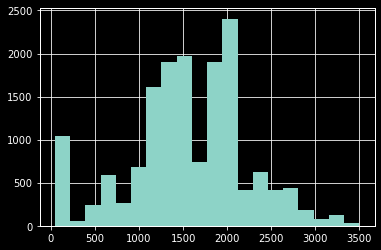

In [154]:
df['engine_capacity_cc'].hist(bins=20)
plt.style.use('dark_background')

We can accept this distribution and will now check and handle their nulls

In [155]:
#check values of 'engine_capacity_cc'
df['engine_capacity_cc'].describe()

count    15726.000000
mean      1561.812476
std        666.705824
min         44.000000
25%       1199.000000
50%       1598.000000
75%       1995.000000
max       3500.000000
Name: engine_capacity_cc, dtype: float64

Below code is to round this mean value

In [156]:
df['engine_capacity_cc'].mean()

1561.8124761541396

In [157]:
df['engine_capacity_cc'].fillna(1652, inplace=True)

In [158]:
df.isnull().sum().sort_values(ascending=False)/df.shape[0]*100

lsoa_of_accident_location    0.235279
2nd_road_number              0.222561
longitude                    0.038153
location_northing_osgr       0.038153
location_easting_osgr        0.038153
                               ...   
area24                       0.000000
area228                      0.000000
area227                      0.000000
area226                      0.000000
x1st_point_of_impact         0.000000
Length: 311, dtype: float64

Note: After doing the above null fixes, propulsion_code dropped from having 10% null values to zero.

we will continue on and fix lsoa_of_accident_location then drop the rest of the null values with are all less than 5%.

In [159]:
df.isnull().sum().sort_values(ascending=False)/df.shape[0]*100

lsoa_of_accident_location    0.235279
2nd_road_number              0.222561
longitude                    0.038153
location_northing_osgr       0.038153
location_easting_osgr        0.038153
                               ...   
area24                       0.000000
area228                      0.000000
area227                      0.000000
area226                      0.000000
x1st_point_of_impact         0.000000
Length: 311, dtype: float64

#### lsoa_of_accident_location

In [160]:
# #lsoa_of_accident_location
df['lsoa_of_accident_location'].value_counts()

E01000004    109
E01002444     62
E01001412     48
E01004736     47
E01004689     36
            ... 
E01025117      1
E01025119      1
E01012728      1
E01001126      1
E01024856      1
Name: lsoa_of_accident_location, Length: 4513, dtype: int64

In [161]:
df['lsoa_of_accident_location'].describe()

count         15689
unique         4513
top       E01000004
freq            109
Name: lsoa_of_accident_location, dtype: object

With numerous unique variable and a high count amount the top variables we are deciding to do ffill again.

In [162]:
df['lsoa_of_accident_location'].fillna(method='ffill', inplace=True)

In [163]:
#### Check nulls for again
df.isnull().sum().sort_values(ascending=False)/df.shape[0]*100

2nd_road_number           0.222561
longitude                 0.038153
location_northing_osgr    0.038153
location_easting_osgr     0.038153
latitude                  0.038153
                            ...   
area228                   0.000000
area227                   0.000000
area226                   0.000000
area225                   0.000000
x1st_point_of_impact      0.000000
Length: 311, dtype: float64

Dropping the remaining nulls that are <1%.

In [164]:
#drop the remaining nulls that are <1%
df.dropna(inplace=True)

#last check
df.isnull().sum().sort_values(ascending=False)/df.shape[0]*100

accident_index          0.0
area92                  0.0
area112                 0.0
area111                 0.0
area110                 0.0
                       ... 
area210                 0.0
area209                 0.0
area197                 0.0
area196                 0.0
x1st_point_of_impact    0.0
Length: 311, dtype: float64

In [165]:
df.shape

(15679, 311)

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15679 entries, 2 to 19998
Columns: 311 entries, accident_index to x1st_point_of_impact
dtypes: category(1), datetime64[ns](1), float64(13), int64(136), object(36), uint8(124)
memory usage: 24.2+ MB


More outliers, categorizing, and other cleanup

In [167]:
#detecting outliers of numerical columns (all floats/ints excluding lat/long and year)

df_num = df[['engine_capacity_cc','number_of_casualties','number_of_vehicles','speed_limit']]

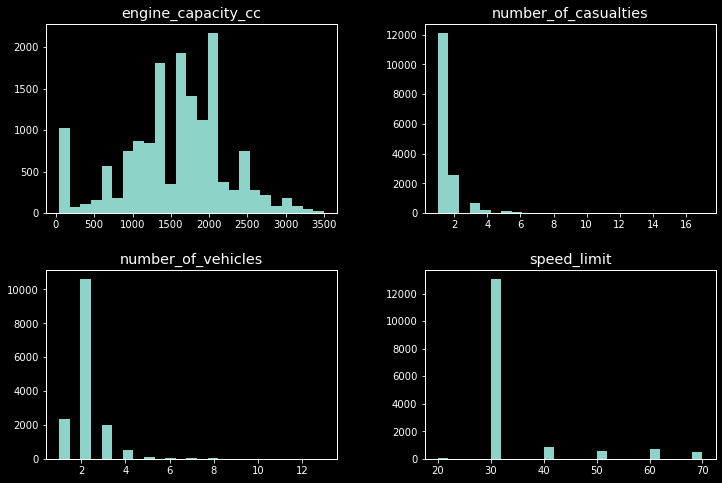

In [168]:
df_num.hist( bins=25, grid=False, figsize=(12,8))
plt.style.use('dark_background')

In [169]:
# #number_of_casualties
df['number_of_casualties'].value_counts()

1     12109
2      2534
3       655
4       204
5       104
6        38
7        25
9         5
8         2
17        1
10        1
13        1
Name: number_of_casualties, dtype: int64

## Below code, we are trying to clean the values for Propulsion Code.¶

In [170]:
df['propulsion_code'] = df['propulsion_code'].replace(to_replace="Gas", value="Petrol")
df['propulsion_code'] = df['propulsion_code'].replace(to_replace="Gas/Bi-fuel", value="Bio-fuel")
df['propulsion_code'] = df['propulsion_code'].replace(to_replace="Petrol/Gas (LPG)", value="LPG Petrol")
df['propulsion_code'] = df['propulsion_code'].replace(to_replace="Gas Diesel", value="Diesel")

In [171]:
df['propulsion_code'].value_counts()/df.shape[0]*100

Petrol             74.685886
Heavy oil          25.039862
Bio-fuel            0.178583
Hybrid electric     0.070158
LPG Petrol          0.025512
Name: propulsion_code, dtype: float64

### Additionally needed Feature Manipulation

In [172]:
df.nunique().sort_values(ascending=False)

accident_index            13656
longitude                 12928
latitude                  12807
location_easting_osgr      6269
location_northing_osgr     5750
                          ...  
area74                        1
area75                        1
area80                        1
area81                        1
area98                        1
Length: 311, dtype: int64

In [69]:
df['date'] = pd.to_datetime(df['date'])

In [173]:
df['month'] = df ['date'].apply(lambda time: time.month) 

In [174]:
#for vehicle_type
df['vehicle_type'].value_counts()/df.shape[0]*100

Car                                      75.068563
Motorcycle over 500cc                     7.302762
Van / Goods 3.5 tonnes mgw or under       6.027170
Motorcycle 125cc and under                4.490082
Taxi/Private hire car                     2.850947
Motorcycle 50cc and under                 1.919765
Motorcycle over 125cc and up to 500cc     1.887876
Minibus (8 - 16 passenger seats)          0.127559
Bus or coach (17 or more pass seats)      0.121181
Goods over 3.5t. and under 7.5t           0.121181
Other vehicle                             0.063780
Goods 7.5 tonnes mgw and over             0.019134
Name: vehicle_type, dtype: float64

### Below code is where we have replaced the specific vehicle type with more generic one 

In [175]:
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Motorcycle over 500cc", 
                                                        value="Motorcycle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace=
                                                        "Motorcycle over 125cc and up to 500cc",
                                                        value="Motorcycle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Motorcycle 125cc and under", 
                                                value="Motorcycle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Motorcycle 50cc and under", 
                                                        value="Motorcycle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Electric motorcycle", 
                                                        value="Motorcycle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Motorcycle - unknown cc", 
                                                        value="Motorcycle")


#Goods_vehicle
df['vehicle_type'] = df['vehicle_type'].replace(to_replace=
                                                        "Van / Goods 3.5 tonnes mgw or under", 
                                                        value="Goods Vehicle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Goods over 3.5t. and under 7.5t", 
                                                        value="Goods Vehicle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Goods vehicle - unknown weight", 
                                                        value="Goods Vehicle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Goods 7.5 tonnes mgw and over", 
                                                        value="Goods Vehicle")

#car
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Taxi/Private hire car", 
                                                        value="Car")


#bus
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Minibus (8 - 16 passenger seats)", 
                                                        value="Bus")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace=
                                                        "Bus or coach (17 or more pass seats)", 
                                                        value="Bus")

#other vehicle
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Agricultural vehicle", 
                                                        value="Other Vehicle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Other vehicle", 
                                                        value="Other Vehicle")

In [176]:
#vehicle_type
df['vehicle_type'].value_counts()/df.shape[0]*100

Car              77.919510
Motorcycle       15.600485
Goods Vehicle     6.167485
Bus               0.248740
Other Vehicle     0.063780
Name: vehicle_type, dtype: float64

### below we have created a more condense groups for age band of driver to deal with some potential outliers.

In [177]:
df['age_band_of_driver'].value_counts()/df.shape[0]*100

26 - 35                         23.203010
36 - 45                         22.086868
46 - 55                         13.049302
Data missing or out of range    12.934498
21 - 25                         10.128197
56 - 65                          7.060399
16 - 20                          6.601186
66 - 75                          3.246381
Over 75                          1.626379
11 - 15                          0.063780
Name: age_band_of_driver, dtype: float64

### Here we have created seasons column or Machine Learning 

In [178]:
def getSeason(month):
    if (month == 12 or month == 1 or month == 2):
       return "winter"
    elif(month == 3 or month == 4 or month == 5):
       return "spring"
    elif(month == 6 or month== 7 or month == 8):
       return "summer"
    else:
       return "fall"

df['season'] = df['month'].apply(getSeason)

In [179]:
# number_of_vehicles
df['season'].value_counts()/df.shape[0]*100

fall      27.508132
summer    25.377894
spring    24.242618
winter    22.871357
Name: season, dtype: float64

### For visualization purpose, we are further creating the groups of engine capacity  

### All similar steps are also for building our understanding on actual numbers

In [180]:
def enginecap(eng_cc):
    if eng_cc <=1500:
        return "small engine cc"
    if eng_cc >1500 and eng_cc <=2000:
        return "medium engine cc"
    if eng_cc >2000:
        return "large engine cc"


df['engine_capacity_cc_size'] = df['engine_capacity_cc'].apply(enginecap)

In [181]:
df.engine_capacity_cc_size.value_counts()

medium engine cc    6678
small engine cc     6672
large engine cc     2329
Name: engine_capacity_cc_size, dtype: int64

# Below code is to create new column for Machine Learning and Visualization with Not Serious and Serious

In [182]:
temp=df
df['accident_seriousness'] = df['accident_severity']
df['accident_seriousness'] = df['accident_seriousness'].replace(to_replace="Slight", 
                                                                value="Not Serious")
df['accident_seriousness'] = df['accident_seriousness'].replace(to_replace="Serious",
                                                                value="Serious")
df['accident_seriousness'] = df['accident_seriousness'].replace(to_replace="Fatal", 
                                                                value="Serious")
df.shape

(15679, 315)

In [183]:
df.accident_seriousness.value_counts()

Not Serious    13740
Serious         1939
Name: accident_seriousness, dtype: int64

# General Visualizations

# Since limited data has been considered (only 20000 records) for evaluation, we are viewing data for only 1 year(2005). If considered entire dataset, we will get results for year in the range 2005 - 2016

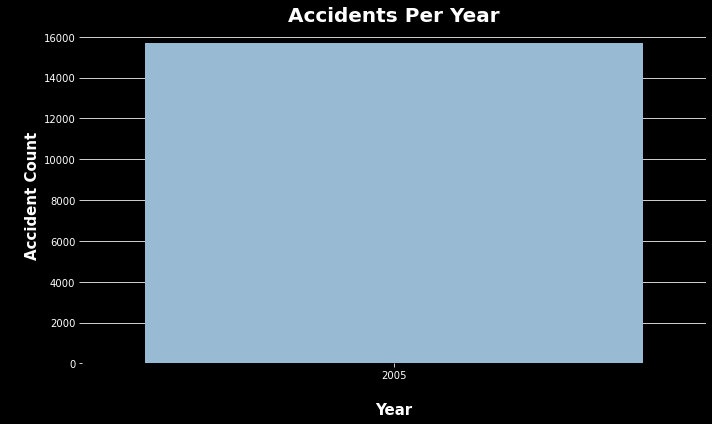

In [184]:
accidentsperyear = df.groupby(['year'])['accident_index'].count()

# prepare plot
#plt.style.use('dark_background')
plt.figure(figsize=(10,6))
colors = sns.color_palette("Blues_d", n_colors=7)
sns.barplot(accidentsperyear.index,accidentsperyear.values, palette=colors)
sns.despine(top=True, right=True, left=True, bottom=True)
plt.title("Accidents Per Year",fontsize=20,fontweight="bold")
plt.xlabel("\nYear", fontsize=15, fontweight="bold")
plt.ylabel("\nAccident Count", fontsize=15, fontweight="bold")
plt.savefig('accidentsperyear.png')
plt.tight_layout()

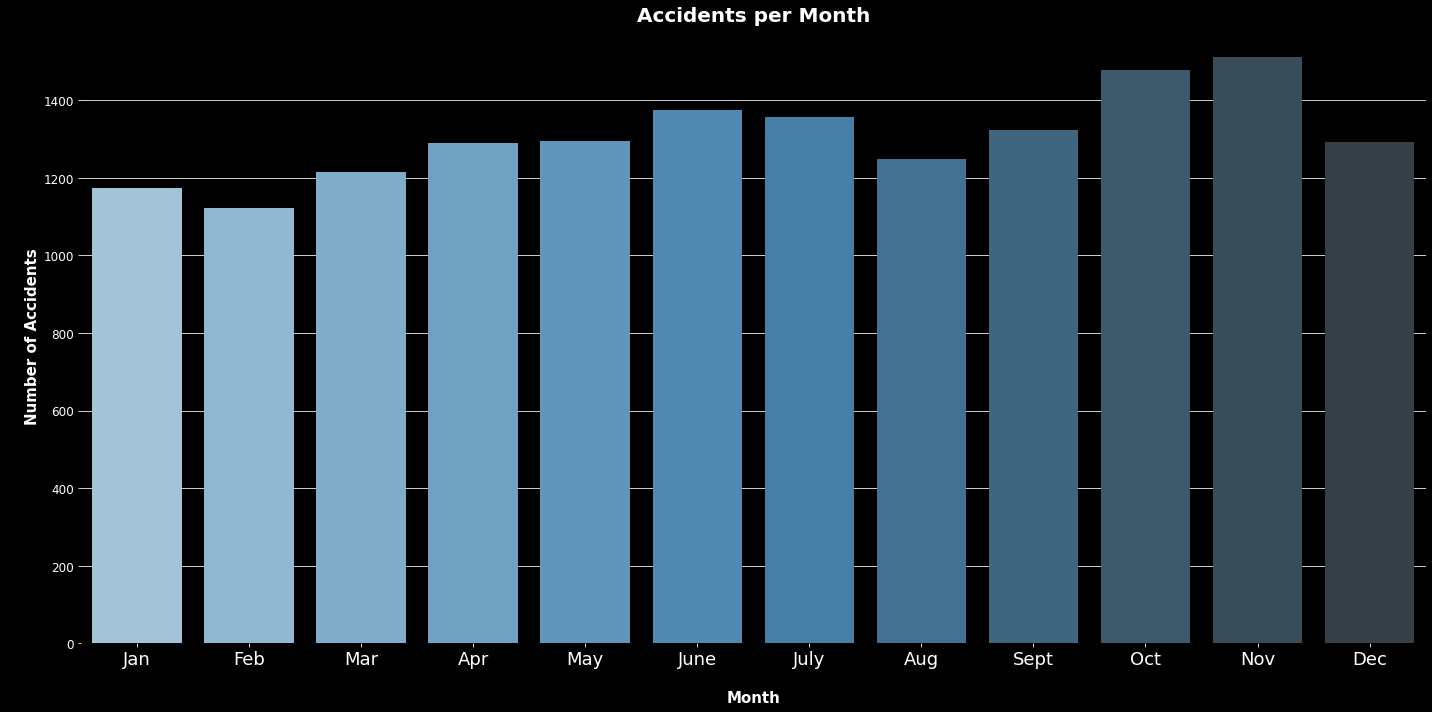

In [185]:
accidentspermonth = df.groupby(['month'])['accident_index'].count()

# prepare plot
plt.style.use('dark_background')
plt.figure(figsize=(20,10))
colors = sns.color_palette("Blues_d", n_colors=12)
mt=sns.barplot(accidentspermonth.index,accidentspermonth.values, palette=colors)
sns.despine(top=True, right=True, left=True, bottom=True)
#ax is the axes instance
group_labels = ['Jan', 'Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec' ]

mt.set_xticklabels(group_labels)
plt.title("Accidents per Month",fontsize=20,fontweight="bold")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.xlabel("\nMonth", fontsize=15, fontweight="bold")
plt.ylabel("\nNumber of Accidents", fontsize=15, fontweight="bold")
plt.savefig('accidentspermonth.png')
plt.tight_layout()


# Below is code the visualization 

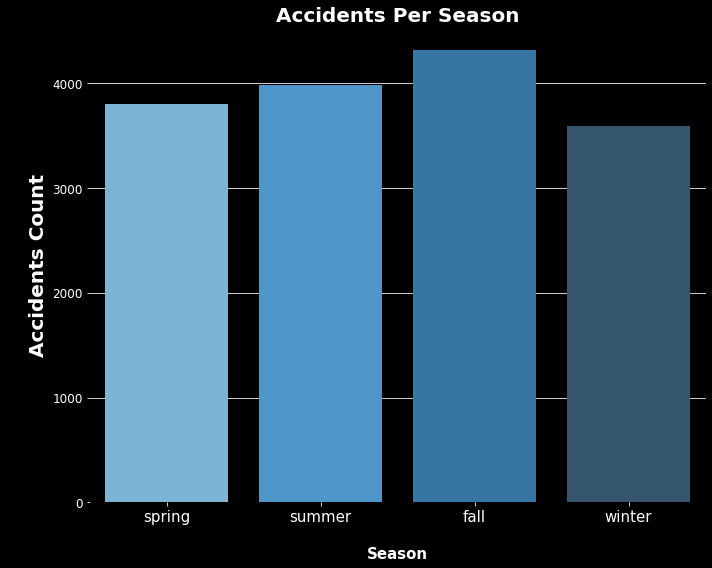

In [186]:
accidentsperseason = df.groupby(['season'])['accident_index'].count()
seaord=['spring', 'summer', 'fall','winter']
# prepare plot
plt.style.use('dark_background')
plt.figure(figsize=(10,8))

sns.barplot(accidentsperseason.index,accidentsperseason.values, order=seaord, 
            saturation=1, palette='Blues_d')
sns.despine(top=True, right=True, left=True, bottom=True)
plt.title("Accidents Per Season",fontsize=20,fontweight="bold")
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel("\nSeason", fontsize=15, fontweight="bold")
plt.ylabel("\nAccidents Count", fontsize=20, fontweight="bold")
plt.tight_layout()

# The below code is to plot graph by type of vehicles involved into accident.

### For visual reasons, two separate dataframes are created, for not serious and serious accidents, to better scale the data.

### dataframe where accidents are Slight

In [187]:
#dataframe where accidents are Slight
not_serious = df[(df['accident_seriousness']=="Not Serious")]
print("Not Serious Group Shape:", not_serious.shape)

not_serious.accident_seriousness.value_counts()

Not Serious Group Shape: (13740, 315)


Not Serious    13740
Name: accident_seriousness, dtype: int64

dataframe where accidents are serious

In [188]:
serious= df[(df['accident_seriousness']=="Serious")]

print("Serious Group Shape:", serious.shape)
serious.accident_seriousness.value_counts()

Serious Group Shape: (1939, 315)


Serious    1939
Name: accident_seriousness, dtype: int64

In [189]:
dftotal= float(len(df))
nstotal= float(len(not_serious))
setotal= float(len(serious))

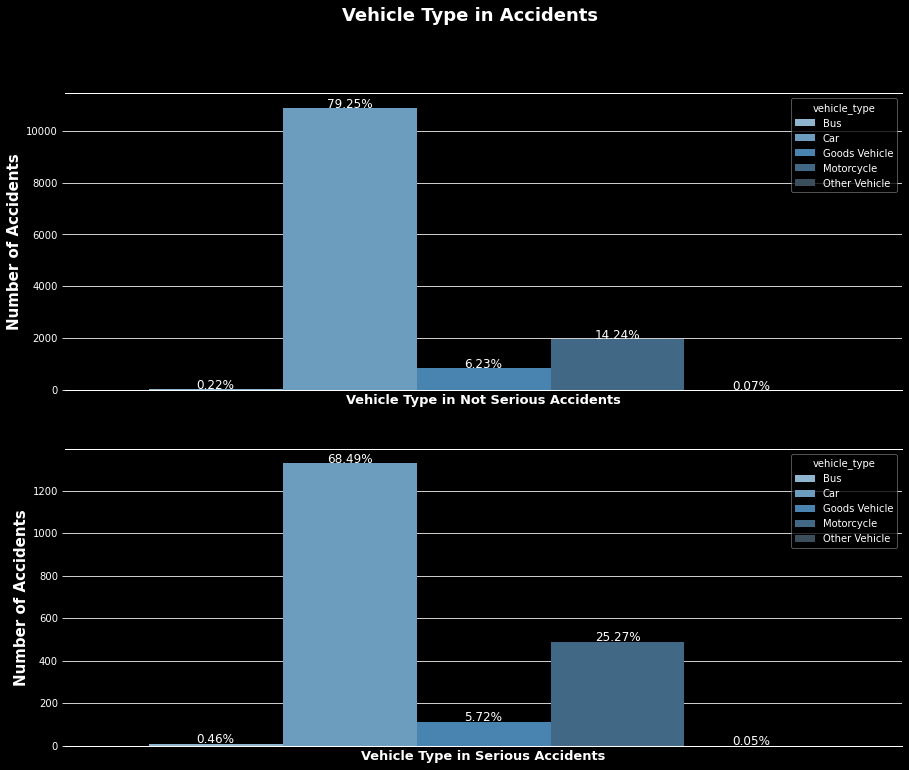

In [190]:
vt_order=['Bus', 'Car', 'Goods Vehicle', 'Motorcycle', 'Other Vehicle']

fig, ax =plt.subplots(nrows=2, ncols=1,figsize = (15,12))
sns.despine(top=False, right=True, left=True)
ax1 =sns.countplot("accident_seriousness", hue="vehicle_type", hue_order=vt_order,
              palette="Blues_d", data=not_serious, ax=ax[0])
plt.style.use('dark_background')
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
ax2 =  sns.countplot("accident_seriousness", hue="vehicle_type", hue_order=vt_order,
              palette="Blues_d", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12) 
fig.suptitle("Vehicle Type in Accidents", fontsize=18, fontweight="bold")
ax1.set_xlabel('Vehicle Type in Not Serious Accidents\n\n', fontsize=13, fontweight="bold")
ax2.set_xlabel('Vehicle Type in Serious Accidents', fontsize=13, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax2.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.savefig('vehicle_type.png')
fig.show()

# The below graphs show the speed limit by accident in areas where the accidents occured.

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


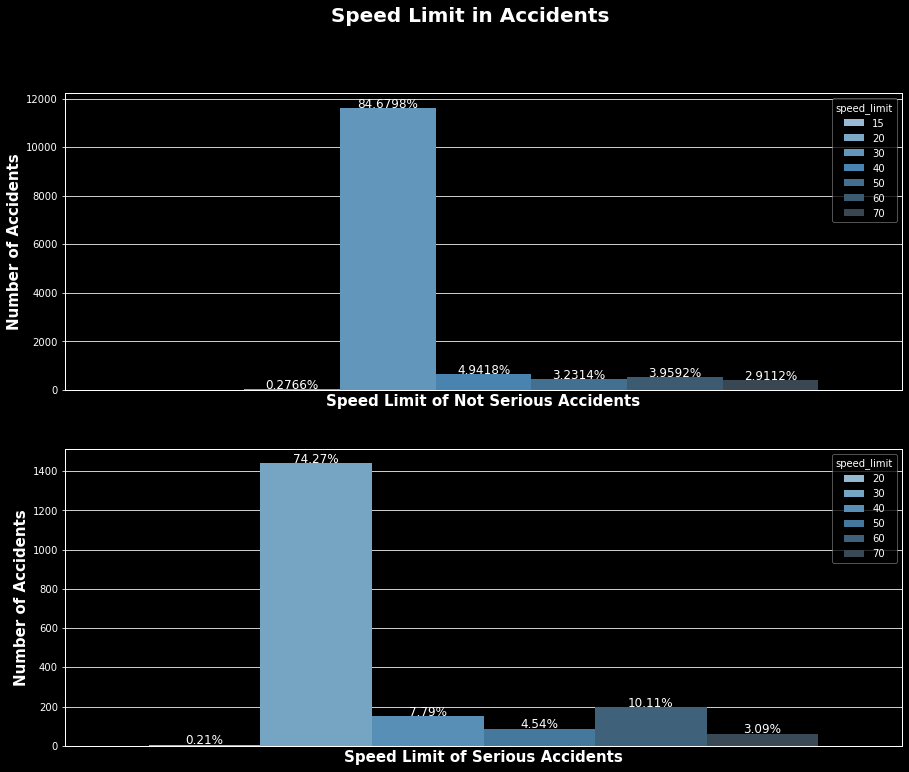

In [191]:
splt_order=[15, 20,30,40,50,60,70]
splt_order2=[20,30,40,50,60,70]
fig, ax =plt.subplots(nrows=2, ncols=1,figsize = (15,12))

ax1 =sns.countplot("accident_seriousness", hue="speed_limit", hue_order=splt_order,
              palette="Blues_d", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.4f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
ax2 =  sns.countplot("accident_seriousness", hue="speed_limit", hue_order=splt_order2,
              palette="Blues_d", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12) 
fig.suptitle("Speed Limit in Accidents", fontsize=20, fontweight="bold")
ax1.set_xlabel('Speed Limit of Not Serious Accidents', fontsize=15, fontweight="bold")
ax2.set_xlabel('Speed Limit of Serious Accidents', fontsize=15, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
plt.savefig('speed_limit.png')
fig.show()

# Visualization accounding to the age_band_of_driver

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


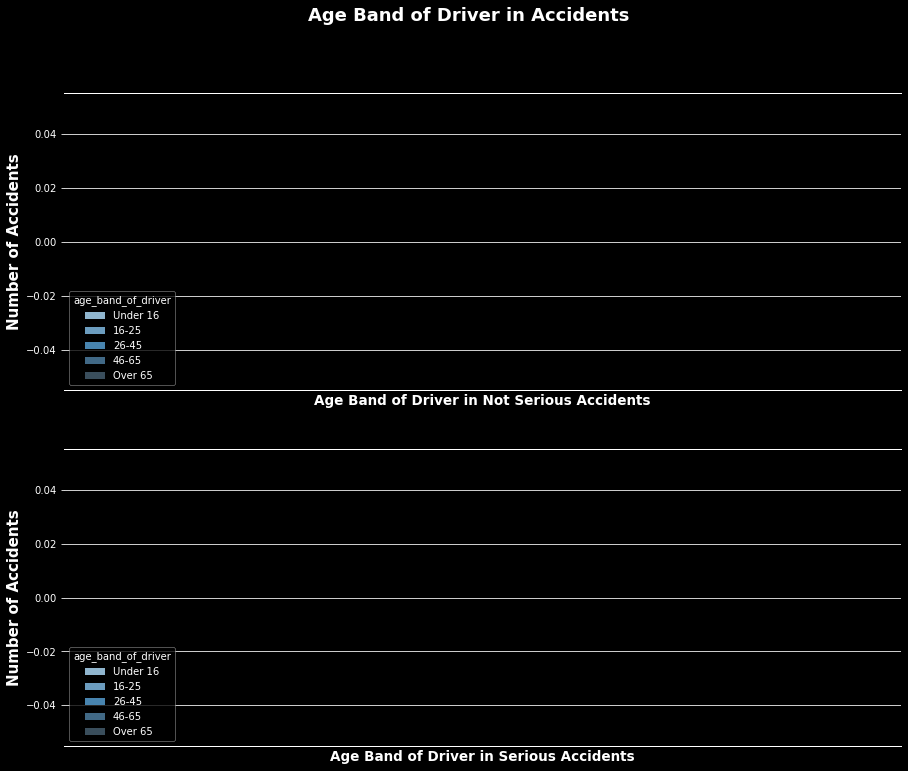

In [192]:
abod_order=['Under 16', '16-25', '26-45', '46-65','Over 65']


fig, ax =plt.subplots(nrows=2, ncols=1,figsize = (15,12))
sns.despine(top=False, right=True, left=True)

ax1 =sns.countplot("accident_seriousness", hue="age_band_of_driver", hue_order=abod_order,
              palette="Blues_d", data=not_serious, ax=ax[0])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
    
ax2 =  sns.countplot("accident_seriousness", hue="age_band_of_driver", hue_order=abod_order,
              palette="Blues_d", data=serious, ax=ax[1])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/setotal*100),
            ha="center",fontsize=12)
    
fig.suptitle("Age Band of Driver in Accidents", fontsize=18, fontweight="bold")
ax1.set_xlabel('Age Band of Driver in Not Serious Accidents\n', fontsize=13.5, fontweight="bold")
ax2.set_xlabel('Age Band of Driver in Serious Accidents', fontsize=13.5, fontweight="bold")
ax1.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax2.set_ylabel('Number of Accidents', fontsize=15, fontweight="bold")
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
fig.show()

# Machine Learning Models

In [90]:
df.set_index('accident_index', inplace=True)
df.head()

,1st_road_class,1st_road_number,2nd_road_number,accident_severity,carriageway_hazards,date,day_of_week,did_police_officer_attend_scene_of_accident,junction_control,junction_detail,...,vehicle_locationrestricted_lane,vehicle_manoeuvre,vehicle_reference,vehicle_type,was_vehicle_left_hand_drive,x1st_point_of_impact,month,season,engine_capacity_cc_size,accident_seriousness
accident_index,,,,,,,,,,,,,,,,,,,,,
200501BS00004,A,3220.0,0.0,Slight,None,2005-01-07,Friday,1.0,Data missing or out of range,Not at junction or within 20 metres,...,0.0,Going ahead other,1,Car,No,Front,1,winter,medium engine cc,Not Serious
200501BS00005,Unclassified,0.0,0.0,Slight,None,2005-01-10,Monday,1.0,Data missing or out of range,Not at junction or within 20 metres,...,0.0,Going ahead other,1,Motorcycle,No,Front,1,winter,small engine cc,Not Serious
200501BS00006,Unclassified,0.0,0.0,Slight,None,2005-01-11,Tuesday,1.0,Data missing or out of range,Not at junction or within 20 metres,...,0.0,Moving off,1,Car,No,Did not impact,1,winter,large engine cc,Not Serious
200501BS00006,Unclassified,0.0,0.0,Slight,None,2005-01-11,Tuesday,1.0,Data missing or out of range,Not at junction or within 20 metres,...,0.0,Going ahead other,2,Motorcycle,No,Did not impact,1,winter,small engine cc,Not Serious
200501BS00012,A,4.0,325.0,Slight,None,2005-01-16,Sunday,1.0,Auto traffic signal,Crossroads,...,0.0,Going ahead other,1,Car,No,Front,1,winter,medium engine cc,Not Serious


In [193]:
df = temp.drop(['accident_severity'],axis=1)

Label Encoder is used instead of OneHotEncoder due to the memory errors One Hot Encoder caused in the data.

In [194]:
#Set up of X and Y
X= df.drop(['accident_seriousness'],axis=1)
y= df['accident_seriousness']


In [195]:
df.accident_seriousness.value_counts()

Not Serious    13740
Serious         1939
Name: accident_seriousness, dtype: int64

In [196]:
df.dtypes

accident_index              object
1st_road_class              object
1st_road_number            float64
2nd_road_number            float64
carriageway_hazards         object
                            ...   
x1st_point_of_impact        object
month                        int64
season                      object
engine_capacity_cc_size     object
accident_seriousness        object
Length: 314, dtype: object

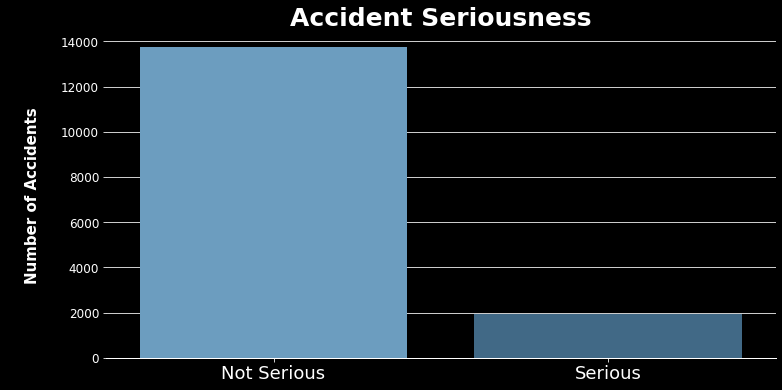

In [197]:
plt.figure(figsize=(12,6))
ax=sns.countplot(x="accident_seriousness", palette="Blues_d", data=df)

plt.style.use('dark_background')
plt.title("Accident Seriousness",fontsize=25,fontweight="bold")
plt.xlabel("", fontsize=15, fontweight="bold")
plt.ylabel("\nNumber of Accidents\n", fontsize=15, fontweight="bold")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
sns.despine(top=True, right=True, left=True, bottom=False)
plt.savefig('accident_seriousness.png')
plt.show()

In [198]:
# setting up testing and training sets
res_X_train, res_X_test, res_y_train, res_y_test = train_test_split(X, y, 
                                                                    test_size=0.25, random_state=27)

In [199]:
# concatenate our training data back together
res_X = pd.concat([res_X_train, res_y_train], axis=1)

In [200]:
# separate minority and majority classes
not_severe = res_X[res_X.accident_seriousness=="Not Serious"]
severe = res_X[res_X.accident_seriousness=="Serious"]

In [201]:
# decrease majority
not_severe_decreased = resample(not_severe,
                          replace=True, # sample with replacement
                          n_samples=len(severe), # match number in majority class
                          random_state=27) # reproducible results

In [202]:
# combine majority and severe_increased minority
newdf = pd.concat([severe, not_severe_decreased])

In [203]:
newdf.accident_seriousness.value_counts()

Serious        1476
Not Serious    1476
Name: accident_seriousness, dtype: int64

In [204]:
res_X_train = newdf.drop('accident_seriousness', axis=1)
res_y_train = newdf.accident_seriousness

# Supervised Learning

### Random Forest Classifier 

In [ ]:
#confusion matrix plot function
def cm_plot(var):
    plt.figure(figsize=(15,5))
    plt.style.use('dark_background')
    plt.clf()
    plt.imshow(var, interpolation='nearest', cmap='tab20')
    classNames = ['No Loyalty','Loyalty']
    plt.title('Confusion Matrix')
    plt.ylabel('Actual\n')
    plt.xlabel('Predicted\n')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+"="+str(var[i][j]),horizontalalignment='center', 
                     color='black')
    plt.show()

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
#Try modeling using  different classification models
classifiers = [
    RandomForestClassifier(criterion='entropy', max_depth=40,max_features=X.shape[1], 
                           min_samples_split=8, n_estimators=500, random_state=42)
    ]
    
    #putting results in df
res_cols=["Classifier", "Accuracy", "Log Loss", "Cross Val", "Recall", "Roc Auc","F1", 
          "False Positive Rate", "Error Rate"]
results = pd.DataFrame(columns=res_cols)

res_y_train=enc.transform(res_y_train)
    
for clf in classifiers:
    clf.fit(res_X_train, res_y_train)
    name = clf.__class__.__name__
    
    print("\n"*3)
    print(name,"Results:")
       
    print('~'*40)
    y_pred = clf.predict(res_X_test)
    acc = accuracy_score(res_y_test, y_pred)
    print("Accuracy: {:.4%}".format(acc))
    
    cv= np.mean(cross_val_score(clf, res_X_train, res_y_train, cv=3))
    print("Cross validation scores:",cv)
    
    
    train_predictions = clf.predict_proba(res_X_test)
    logloss = log_loss(res_y_test, train_predictions)
    print("Log Loss: {}".format(logloss))
    
    cm = confusion_matrix(res_y_test, y_pred)
    
    cm_plot(cm)
    
    #FPR and Error Rate setup
    tn, fp, fn, tp = confusion_matrix(res_y_test,y_pred).ravel()
    
    fpr = fp/(tn+fp)
    ers = 1-acc
    rec= recall_score(res_y_test, y_pred)
    roc=roc_auc_score(res_y_test, y_pred)
    f1s=f1_score(res_y_test, y_pred)
    results_final = pd.DataFrame([[name, round(acc*100,3), round(logloss,3), 
                                   round(cv*100,3), round(rec*100,3), round(roc*100,3),
                                   round(f1s*100,3),round(fpr*100,3),round(ers*100,3)]],
                                 columns=res_cols)
    results = results.append(results_final)
    
    print("*"*40)

In [ ]:
print("Final Results Shape",results.shape)
results.head(10)

### Visualize score for model¶

In [ ]:
fig, ax =plt.subplots(nrows=8, ncols=1, figsize = (11,18))
sns.barplot(x='Accuracy', y='Classifier', data=ml_results, palette='Blues_d', ax=ax[0])
sns.barplot(x='Log Loss', y='Classifier', data=ml_results, palette='Blues_d', ax=ax[1])
sns.barplot(x='Cross Val', y='Classifier', data=ml_results, palette='Blues_d', ax=ax[2])
sns.barplot(x='Recall', y='Classifier', data=ml_results, palette='Blues_d', ax=ax[3])
sns.barplot(x='Roc Auc', y='Classifier', data=ml_results, palette='Blues_d', ax=ax[4])
sns.barplot(x='F1', y='Classifier', data=ml_results, palette='Blues_d', ax=ax[5])
sns.barplot(x='False Positive Rate', y='Classifier', data=ml_results, palette='Blues_d', ax=ax[6])
sns.barplot(x='Error Rate', y='Classifier', data=ml_results, palette='Blues_d', ax=ax[7])

plt.tight_layout()
plt.show()

# SVM classifier

In [275]:
accidents = pd.read_csv('Accident_Information.csv')

vehicles = pd.read_csv('Vehicle_Information.csv')

accidents['Date']= pd.to_datetime(accidents['Date'], format="%Y-%m-%d")

accidents['Date'].iloc[:100]

accidents['Hour'] = accidents['Time'].str[0:2]

accidents['Hour'] = pd.to_numeric(accidents['Hour'])

accidents = accidents.dropna(subset=['Hour'])

accidents['Hour'] = accidents['Hour'].astype('int')


In [276]:
def when_was_it(hour):
    if hour >= 5 and hour < 10:
        return "1"
    elif hour >= 10 and hour < 15:
        return "2"
    elif hour >= 15 and hour < 19:
        return "3"
    elif hour >= 19 and hour < 23:
        return "4"
    else:
        return "5"

In [277]:
daytime_groups = {1: 'Morning: Between 5 and 10', 
                  2: 'Office Hours: Between 10 and 15', 
                  3: 'Afternoon Rush: Between 15 and 19', 
                  4: 'Evening: Between 19 and 23', 
                  5: 'Night: Between 23 and 5'}

In [269]:
accidents['Daytime'] = accidents['Hour'].apply(when_was_it)
accidents[['Time', 'Hour', 'Daytime']].head()

accidents.isna().sum()

Accident_Index                                      0
1st_Road_Class                                      0
1st_Road_Number                                     2
2nd_Road_Class                                 844186
2nd_Road_Number                                 17587
Accident_Severity                                   0
Carriageway_Hazards                                 0
Date                                                0
Day_of_Week                                         0
Did_Police_Officer_Attend_Scene_of_Accident       277
Junction_Control                                    0
Junction_Detail                                     0
Latitude                                          174
Light_Conditions                                    0
Local_Authority_(District)                          0
Local_Authority_(Highway)                           0
Location_Easting_OSGR                             164
Location_Northing_OSGR                            164
Longitude                   

In [279]:
# accidents = accidents.drop(columns=['1st_Road_Class','1st_Road_Number','2nd_Road_Class', '2nd_Road_Number', 
#                                     'Did_Police_Officer_Attend_Scene_of_Accident',
#                                     'Location_Easting_OSGR', 'Location_Northing_OSGR', 
#                                     'Longitude', 'Latitude', 'LSOA_of_Accident_Location',
#                                     'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities',
#                                     'InScotland'])
# # accidents.columns

accidents = accidents.dropna()

# accidents.isna().sum()

columns_accidentdata=accidents.columns
columns_vehicledata=vehicles.columns

df_svm = pd.merge(accidents[columns_accidentdata], 
              vehicles[columns_vehicledata], 
              on='Accident_Index')

df_svm = df_svm.dropna()
df_svm.isna().sum()

for col in ['Accident_Severity', 'Speed_limit', 'Urban_or_Rural_Area',
            'Age_Band_of_Driver', 'Sex_of_Driver', 'Vehicle_Manoeuvre','Road_Surface_Conditions','Weather_Conditions','Road_Type',
           'Driver_Home_Area_Type']:
    df_svm[col] = df_svm[col].astype('category')


In [280]:
#dropping unnecessary columns and changing the column types to supportive types.

df_svm=df_svm.drop(['Carriageway_Hazards'],axis=1)
df_svm=df_svm.drop(['Local_Authority_(District)'],axis=1)
df_svm=df_svm.drop(['Local_Authority_(Highway)'],axis=1)
df_svm=df_svm.drop(['Police_Force'],axis=1)
df_svm['Junction_Control'].replace({'Data missing or out of range':'Give way or uncontrolled'},inplace=True)
df_svm['Junction_Control'] = df_svm['Junction_Control'].astype('category')
df_svm['Junction_Detail'] = df_svm['Junction_Detail'].astype('category')
df_svm=df_svm.drop(['Hit_Object_in_Carriageway'],axis=1)
df_svm=df_svm.drop(['Hit_Object_off_Carriageway'],axis=1)
df_svm['Propulsion_Code'] = df_svm['Propulsion_Code'].astype('category')
df_svm['X1st_Point_of_Impact'] = df_svm['X1st_Point_of_Impact'].astype('category')
condition = (df_svm['Engine_Capacity_.CC.'] < 20000)
df_svm = df_svm[condition]

In [284]:
age_of_vehicle_bins = {1: '1 to <2 years', 
                       2: '2 to <3 years', 
                       3: '3 to <7 years', 
                       4: '7 to <10 years', 
                       5: '>=10 years'}

df_svm['Age_of_Vehicle'] = np.digitize(df_svm['Age_of_Vehicle'], bins=[1,2,3,7,10])
df_svm['Age_of_Vehicle'] = df_svm['Age_of_Vehicle'].astype('category')
df_svm['Age_of_Vehicle'].value_counts().sort_index()

df_svm['Light_Conditions']=df_svm['Light_Conditions'].astype('category')
df_svm['Day_of_Week']=df_svm['Day_of_Week'].astype('category')
df_svm['Special_Conditions_at_Site']=df_svm['Special_Conditions_at_Site'].astype('category')

df_svm['Vehicle_Leaving_Carriageway']=df_svm['Vehicle_Leaving_Carriageway'].astype('category')

df_svm['Vehicle_Type']=df_svm['Vehicle_Type'].astype('category')

df_svm['Was_Vehicle_Left_Hand_Drive']=df_svm['Was_Vehicle_Left_Hand_Drive'].astype('category')

df_svm['Speed_limit']=df_svm['Speed_limit'].astype('float64')

df_svm['Age_of_Vehicle']=df_svm['Age_of_Vehicle'].astype('float64')

In [288]:
num_cols = ['Engine_Capacity_.CC.','Vehicle_Reference','Number_of_Casualties','Number_of_Vehicles',
            'Vehicle_Location.Restricted_Lane','Driver_IMD_Decile']

cat_cols = ['Day_of_Week','Junction_Control','Light_Conditions','Road_Surface_Conditions',
            'Road_Type','Special_Conditions_at_Site','Speed_limit','Urban_or_Rural_Area','Weather_Conditions',
            'Age_Band_of_Driver', 'Age_of_Vehicle', 'Sex_of_Driver', 'Vehicle_Manoeuvre',
           'Vehicle_Type','X1st_Point_of_Impact','Propulsion_Code']

# define target col
target_col = ['Accident_Severity']
cols = cat_cols + num_cols + target_col

non_numerics = ['object','category']

 Accuracy for svm with 10000 datapoints: 0.9086666666666666
F1 score for SVM with 10000 datapoints: 0.31738269880079173
Recall for SVM with 10000 datapoints: 0.9086666666666666
Precision for SVM with 10000 datapoints: 0.825675111111111


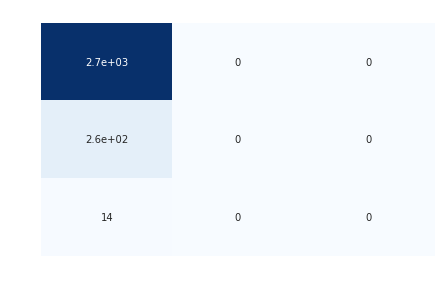

In [295]:
# confusion matrix and performance metrics for 1000 records

number=10000

df_model = df_svm[cols].iloc[:number]
newdf = df_model.select_dtypes(include=non_numerics)
    
    # replacing category and object variables into numerical attributes
    
for col in newdf:
    value_dict={}
    int_value=0
    for value in df_model[col].unique():
        if not value in value_dict.keys():
            int_value=int_value+1
            value_dict[value]=int_value
    df_model[col]=df_model[col].replace(value_dict)

features = df_model.drop(['Accident_Severity'], axis=1)
target = df_model[['Accident_Severity']]
    
X_train, X_test, y_train, y_test = train_test_split(features.iloc[:number], target.iloc[:number], test_size=0.3)
    
    #     initializing encoder for attributes
    
enc = OrdinalEncoder(handle_unknown='ignore')

enc.fit(X_train)

X_train=enc.transform(X_train)

enc = OrdinalEncoder(handle_unknown='ignore')

enc.fit(X_train)

X_train=enc.transform(X_train)
    
    #     initializing encoder for class labels
    
enc1 = OrdinalEncoder(handle_unknown='ignore')

enc1.fit(y_train)

y_train=enc1.transform(y_train)
    
    
    #Creating a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

    #Training the model using the training sets
clf.fit(X_train, y_train)
    
clf = svm.SVC(kernel='linear') # Linear Kernel

    #Train the model using the training sets
clf.fit(X_train, y_train)
    
    
X_test=enc.transform(X_test)
    
y_test=enc1.transform(y_test)
    
    
    #Predict the response for test dataset
    
y_pred = clf.predict(X_test)
    

print (' Accuracy for svm with {} datapoints: {}'.format(number, accuracy_score(y_test, y_pred)))
print('F1 score for SVM with {} datapoints: {}'.format(number, f1_score(y_test, y_pred,average='macro')))
print('Recall for SVM with {} datapoints: {}'.format(number, recall_score(y_test, y_pred,average='micro')))
print('Precision for SVM with {} datapoints: {}'.format(number, precision_score(y_test, y_pred,average='weighted')))
    
    
    #     Plotting confusion matrix

matrix = confusion_matrix(y_test, y_pred)

    # create dataframe
class_names = df_model.Accident_Severity.values
dataframe = pd.DataFrame(matrix, index=[0, 1, 2], 
                         columns=[0, 1, 2])

    # create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap='Blues')
plt.title('Confusion Matrix')
plt.tight_layout(), plt.xlabel('True Values'), plt.ylabel('Predicted Values')
plt.show()

 Accuracy for svm with 1000 datapoints: 0.8866666666666667
F1 score for SVM with 1000 datapoints: 0.46996466431095407
Recall for SVM with 1000 datapoints: 0.8866666666666667
Precision for SVM with 1000 datapoints: 0.7861777777777779


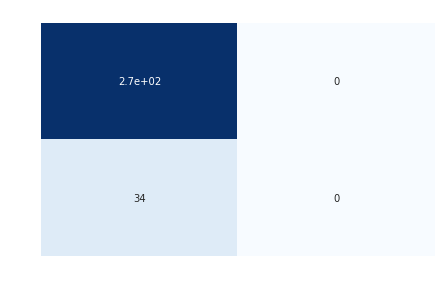

In [296]:
# confusion matrix and performance metrics for 10000 records

number=1000


df_model = df_svm[cols].iloc[:number]
newdf = df_model.select_dtypes(include=non_numerics)
    
    # replacing category and object variables into numerical attributes
    
for col in newdf:
    value_dict={}
    int_value=0
    for value in df_model[col].unique():
        if not value in value_dict.keys():
            int_value=int_value+1
            value_dict[value]=int_value
    df_model[col]=df_model[col].replace(value_dict)

features = df_model.drop(['Accident_Severity'], axis=1)
target = df_model[['Accident_Severity']]
    
X_train, X_test, y_train, y_test = train_test_split(features.iloc[:number], target.iloc[:number], test_size=0.3)
    
    #     initializing encoder for attributes
    
enc = OrdinalEncoder(handle_unknown='ignore')

enc.fit(X_train)

X_train=enc.transform(X_train)

enc = OrdinalEncoder(handle_unknown='ignore')

enc.fit(X_train)

X_train=enc.transform(X_train)
    
    #     initializing encoder for class labels
    
enc1 = OrdinalEncoder(handle_unknown='ignore')

enc1.fit(y_train)

y_train=enc1.transform(y_train)
    
    
    #Creating a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

    #Training the model using the training sets
clf.fit(X_train, y_train)
    
clf = svm.SVC(kernel='linear') # Linear Kernel

    #Train the model using the training sets
clf.fit(X_train, y_train)
    
    
X_test=enc.transform(X_test)
    
y_test=enc1.transform(y_test)
    
    
    #Predict the response for test dataset
    
y_pred = clf.predict(X_test)
    

print (' Accuracy for svm with {} datapoints: {}'.format(number, accuracy_score(y_test, y_pred)))
print('F1 score for SVM with {} datapoints: {}'.format(number, f1_score(y_test, y_pred,average='macro')))
print('Recall for SVM with {} datapoints: {}'.format(number, recall_score(y_test, y_pred,average='micro')))
print('Precision for SVM with {} datapoints: {}'.format(number, precision_score(y_test, y_pred,average='weighted')))
    
    
    #     Plotting confusion matrix

matrix = confusion_matrix(y_test, y_pred)

    # create dataframe
class_names = df_model.Accident_Severity.values
dataframe = pd.DataFrame(matrix, index=[0, 1], 
                         columns=[0, 1])

    # create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap='Blues')
plt.title('Confusion Matrix')
plt.tight_layout(), plt.xlabel('True Values'), plt.ylabel('Predicted Values')
plt.show()

 Accuracy for svm with 20000 datapoints: 0.8996666666666666
F1 score for SVM with 20000 datapoints: 0.3157279054804936
Recall for SVM with 20000 datapoints: 0.8996666666666666
Precision for SVM with 20000 datapoints: 0.8094001111111111


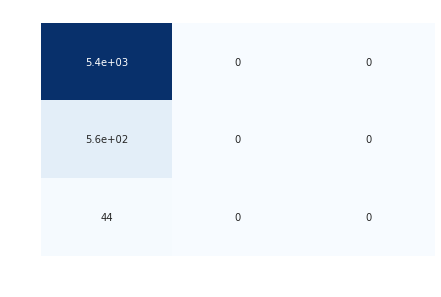

In [297]:
# confusion matrix and performance metrics for 20000 records

number=20000


df_model = df[cols].iloc[:number]
newdf = df_model.select_dtypes(include=non_numerics)
    
    # replacing category and object variables into numerical attributes
    
for col in newdf:
    value_dict={}
    int_value=0
    for value in df_model[col].unique():
        if not value in value_dict.keys():
            int_value=int_value+1
            value_dict[value]=int_value
    df_model[col]=df_model[col].replace(value_dict)

features = df_model.drop(['Accident_Severity'], axis=1)
target = df_model[['Accident_Severity']]
    
X_train, X_test, y_train, y_test = train_test_split(features.iloc[:number], target.iloc[:number], test_size=0.3)
    
    #     initializing encoder for attributes
    
enc = OrdinalEncoder(handle_unknown='ignore')

enc.fit(X_train)

X_train=enc.transform(X_train)

enc = OrdinalEncoder(handle_unknown='ignore')

enc.fit(X_train)

X_train=enc.transform(X_train)
    
    #     initializing encoder for class labels
    
enc1 = OrdinalEncoder(handle_unknown='ignore')

enc1.fit(y_train)

y_train=enc1.transform(y_train)
    
    
    #Creating a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

    #Training the model using the training sets
clf.fit(X_train, y_train)
    
clf = svm.SVC(kernel='linear') # Linear Kernel

    #Train the model using the training sets
clf.fit(X_train, y_train)
    
    
X_test=enc.transform(X_test)
    
y_test=enc1.transform(y_test)
    
    
    #Predict the response for test dataset
    
y_pred = clf.predict(X_test)
    

print (' Accuracy for svm with {} datapoints: {}'.format(number, accuracy_score(y_test, y_pred)))
print('F1 score for SVM with {} datapoints: {}'.format(number, f1_score(y_test, y_pred,average='macro')))
print('Recall for SVM with {} datapoints: {}'.format(number, recall_score(y_test, y_pred,average='micro')))
print('Precision for SVM with {} datapoints: {}'.format(number, precision_score(y_test, y_pred,average='weighted')))
    
    
    #     Plotting confusion matrix

matrix = confusion_matrix(y_test, y_pred)

    # create dataframe
class_names = df_model.Accident_Severity.values
dataframe = pd.DataFrame(matrix, index=[0, 1, 2], 
                         columns=[0, 1, 2])

    # create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap='Blues')
plt.title('Confusion Matrix')
plt.tight_layout(), plt.xlabel('True Values'), plt.ylabel('Predicted Values')
plt.show()